<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Поиск-зависимости-средней-цены-квартиры-от-расстояния-до-центра-и-количества-комнат" data-toc-modified-id="Поиск-зависимости-средней-цены-квартиры-от-расстояния-до-центра-и-количества-комнат-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Поиск зависимости средней цены квартиры от расстояния до центра и количества комнат</a></span></li><li><span><a href="#Поиск-зависимости-цены-кв.-метра-жилья-от-расстояния-до-центра-и-количества-комнат" data-toc-modified-id="Поиск-зависимости-цены-кв.-метра-жилья-от-расстояния-до-центра-и-количества-комнат-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Поиск зависимости цены кв. метра жилья от расстояния до центра и количества комнат</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир <a class="tocSkip">

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

 Описание данных
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

## Изучение данных из файла

In [2]:
# импорт модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# загрузка данных
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Первичное изучение показало, что в данных имеются пропуски значений в столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment` и др. Также тип данных столбца `is_apartment` логичней будет преобразовать в тип `bool`,  `first_day_exposition` в `datetime`, а такие столбцы как `last_price`, `floors_total`, `living_area` и остальные количественные, кроме `ceiling_height`,`kitchen_area` и `living_area` привести к типу `int`.

## Предобработка данных

В столбце `is_apartment` имеется большое количество пропусков и поскольку данные из него не представляют ценности для исследования, его можно удалить. Также можно удалить столбцы `total_images` и `open_plan`так, как количество фотографий в объявлении и наличие свободной планировки очень маловероятно окажут влияние на стоимость.

In [3]:
df.drop(['is_apartment'], axis='columns', inplace=True)
df.drop(['total_images'], axis='columns', inplace=True)
df.drop(['open_plan'], axis='columns', inplace=True)
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски в `balcony` разумно заменить на 0 потому, что его может не быть, а может быть лоджия вместо балкона и ее не отметили. Пропуски в `parks_around3000` и `ponds_around3000`  скорее всего связаны с отсутсвием парка или водоема соответственно, в окресности объекта недвижимости, поэтому их заполним 0. `parks_nearest`,`airports_nearest` и `ponds_nearest` разумно заменить на нехарактерные значения, поскольку пропуски данных в этих столбцах могут повлиять на анализ. За одно приведем их к типу *int*.

In [4]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)

df['balcony'].isna().sum(), df['parks_around3000'].isna().sum(), df['ponds_around3000'].isna().sum()

(0, 0, 0)

Посмотрим на пропуски в колонке общей этажности зданий.

In [5]:
df['floors_total'].isna().sum()

86

Пропуски могли получиться случайно. Их всего 86 из 23699 поэтому в виду из незначительности можем от них избавиться.

In [6]:
df = df[~df['floors_total'].isna()]
df['floors_total'].isna().sum()

0

Пропуски в столбцах `ceiling_height`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` могут иметь влияние на исследование, поэтому мы их удалить не можем и заменим на нехарактерные значения, за одно приведем к нужному типу данных.

In [7]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1).astype(int)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-1).astype(int)
df['parks_nearest'] = df['parks_nearest'].fillna(-1).astype(int)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1).astype(int)


Изучим столбец `ceiling_height`

Пропуски в столбце `ceiling_height` могли появиться просто потому, что не были указаны продавцами в объявлении. Попытаемся определить наиболее подходящий столбец  для группировки, чтобы заполнить пропуски.

In [8]:
list_corr = ['last_price', 'total_area', 'rooms', 'floors_total', 'living_area', 'kitchen_area']
for fitch in list_corr:
    print(fitch, df['ceiling_height'].corr(df[fitch]))

last_price 0.08543504445550398
total_area 0.09550592916692949
rooms 0.054512479902393274
floors_total -0.028731894622727325
living_area 0.09066749835492602
kitchen_area 0.08771799905703535


Как видим ни один из критериев не имеет сильной корреляции с высотой потолков, поэтому заполним пропуски медианным значением самого столбца `ceiling_height`. 

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

Изучим столбец `living_area`

In [10]:
df.query('~living_area.isna()').head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,11.0,2,посёлок Шушары,12817,18603,0,-1,0,-1,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0
4,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0
5,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,9.1,0,городской посёлок Янино-1,-1,-1,0,-1,0,-1,55.0


Пропуски могли появиться в результате перепланировки и утере данных о жилой площади, а может помещение относится к нежилым.
Для заполнения пропусков в `living_area` посчитаем медианные значения сгруппировав по количеству комнат, запишем данные в словарь, и напишем функцию с помощью которой заполним пропуски.

In [11]:
# living_area_dic
living_area_dic = df.query('~living_area.isna()').groupby('rooms')['living_area'].median().to_dict()
df['living_area'] = df['living_area'].fillna(-1)


def living_area_fill(row):
    """
    Возвращает значение площади из словаря living_area_dic
    при условии, что значение living_area == -1
    """
    living_area = row['living_area']
    rooms = row['rooms']
    try:
        if living_area == -1:      
            return living_area_dic[rooms]
        return living_area
    except:
        return None

In [12]:
df['living_area'] = df.apply(living_area_fill, axis=1)

Проверим что получилось.

In [13]:
df['living_area'].isna().sum()

0

In [14]:
len(df.query('living_area == -1'))

0

Пропуски в `kitchen_area`.

In [15]:
df['kitchen_area'].isna().sum()

2231

Пропуски в `kitchen_area` могли появиться из-за того, что помещение является нежилым. Поэтому, чтобы учитывать эти данные в дальнейшем анализе пропуски заполним медианным значением в зависимости от общей площади. Для этого сгруппируем общие площади, найдем медианы для каждой группы, запишем в словарь. Затем, применив написанную для заполнения функцию, заполним пропуски медианами для каждой группы.

Для удобства группировки создадим отдельный столбец где приведем значение общей площади к целомчисленому тип.

In [16]:
df_total_area = df.loc[:,['total_area' ,'kitchen_area']]
df['total_area_int'] = df_total_area['total_area'].round(0).astype(int)
total_kitchen_area_dic = df.query('~kitchen_area.isna()').groupby('total_area_int')['kitchen_area'].median().to_dict()


In [17]:
df['kitchen_area'] = df['kitchen_area'].fillna(-1)

In [18]:
def kitchen_area_fill(row):
    """
    Возвращает значение площади из словаря total_kitchen_area_dic
    при условии, что значение kitchen_area == -1

    """
    total_area = row['total_area_int']
    kitchen_area = row['kitchen_area']
    try:
        if kitchen_area == -1:      
            return total_kitchen_area_dic[total_area]
        return kitchen_area
    except:
        return None

In [19]:
df['kitchen_area'] = df.apply(kitchen_area_fill, axis=1)

In [20]:
df['kitchen_area'].isna().sum()

23

Видимо не все значения площадей попали в словарь. Заменим оставшиеся значения медианой.

In [21]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['kitchen_area'].isna().sum()

0

In [22]:
len(df.query('kitchen_area == -1'))

0

Пропуски в `locality_name`

In [23]:
df['locality_name'].isna().sum()

48

Пропуски могли появиться случайно, их количество незначительно, восстановить их не представляется возможным, поэтому их удаляем.

In [24]:
df.dropna(subset=['locality_name'], inplace=True)

In [25]:
df['locality_name'].isna().sum()

0

Пропуски в `days_exposition` могут свидетельствовать о том, что объявление не снято, т.е. находится в активном состоянии. Количество таких объявлений составляет:

In [26]:
df['days_exposition'].isna().sum()

3171

Чтобы заполнить пробелы сгруппируем данные по названиям населенных пунктов и рассчитаем медианы для каждой группы.
За тем, с помощью написаной функции, заполним пропуски. Для удобства преобразуем тип данных `days_exposition` в *int*.

In [27]:
# df['days_exposition'] = df.query('~days_exposition.isna()')['days_exposition']
days_exposition_dic = df.query('~days_exposition.isna()').groupby('locality_name')['days_exposition'].median().astype(int).to_dict()
df['days_exposition'] = df['days_exposition'].fillna(-1)


In [28]:
def days_exposition_fill(row):
    """
    Возвращает значение экспозиции объявления из словаря days_exposition_dic
    при условии, что значение days_exposition == -1
    """
    days_exposition = row['days_exposition']
    locality_name = row['locality_name']
    try:
        if days_exposition == -1:      
            return days_exposition_dic[locality_name]
        return days_exposition
    except:
        return None

In [29]:
df['days_exposition'] = df.apply(days_exposition_fill, axis=1)

In [30]:
df['days_exposition'].isna().sum()

80

Не все населенные пункты попали в словарь, видимо все объявления с ними в активной стадии. Поэтому оставшиеся пропуски заполним медианой взятой по всем населеным пунктам кроме Санкт-Петербурга.

In [31]:
median_locality_name_without_spb = df.query('locality_name != "Санкт-Петербург"')['days_exposition'].median()
df['days_exposition'] = df['days_exposition'].fillna(median_locality_name_without_spb)

In [32]:
df['days_exposition'].isna().sum()

0

In [33]:
len(df.query('days_exposition == -1'))

0

Преобразуем столбец `first_day_exposition` в формат *datetime*.

In [34]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

Преобразуем к типу целочисленому типу *int* столбцы не требующие высокой точности.

In [35]:
df['days_exposition'] = df['days_exposition'].astype(int)
df['last_price'] = df['last_price'].astype(int)
df['floors_total'] = df['floors_total'].astype(int)
df['last_price'] = df['last_price'].astype(int)

In [36]:
df.duplicated().sum()

0

Дубликатов не обнаружено, движемся дальше.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23565 non-null  int64         
 1   total_area            23565 non-null  float64       
 2   first_day_exposition  23565 non-null  datetime64[ns]
 3   rooms                 23565 non-null  int64         
 4   ceiling_height        23565 non-null  float64       
 5   floors_total          23565 non-null  int64         
 6   living_area           23565 non-null  float64       
 7   floor                 23565 non-null  int64         
 8   studio                23565 non-null  bool          
 9   kitchen_area          23565 non-null  float64       
 10  balcony               23565 non-null  int64         
 11  locality_name         23565 non-null  object        
 12  airports_nearest      23565 non-null  int64         
 13  cityCenters_near

### Вывод

На этом этапе мы закончили обработку пропусков, заполнили их необходимыми и допустимыми значениями, удалили ненужные данные,  привели значения столбцов к нужному типу. Предобработка данных завершена, переходим к следующему этапу.


## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу столбцы:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- столбец категории этажа квартиры (первый, последний, другой)
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Чтобы узнать цену квадратного метра, разделим стоимость квартиры на общую площадь, сразу приведем к типу *int*.

In [38]:
df['price_qu_m'] = (df['last_price']/df['total_area']).astype(int)

In [39]:
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['weekday'] = df['first_day_exposition'].dt.weekday


Посчитаем отношение жилой площади к общей, и площадь кухни к общей.

In [40]:
df['div_living_total_area'] = (df['living_area']/df['total_area']).round(1)
df['div_kitchen_total_area'] = (df['kitchen_area']/df['total_area']).round(1)

Создадим столбец с категориями этажности: первый, последний, другой.

In [41]:
df['floor_type'] = np.where((df['floor'] == 1), 'первый', np.where((df['floor'] == df['floors_total']), 'последний', 'другой' ))


In [42]:
df.tail()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,...,ponds_nearest,days_exposition,total_area_int,price_qu_m,year,month,weekday,div_living_total_area,div_kitchen_total_area,floor_type
23694,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,13.83,...,381,95,134,72490,2017,3,1,0.5,0.1,другой
23695,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,8.50,...,-1,45,59,52542,2018,1,0,0.6,0.1,другой
23696,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,8.15,...,-1,99,57,44091,2018,2,6,0.5,0.1,первый
23697,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,False,23.30,...,196,602,77,149511,2017,3,1,0.4,0.3,другой
23698,1350000,32.30,2017-07-21,1,2.50,5,12.3,1,False,9.00,...,-1,127,32,41795,2017,7,4,0.4,0.3,первый


### Вывод

Мы добавили столбцы с годом, месяцем и днем недели размещения объявления. Добавили категориальный столбец, характеризующий положение объекта относительно этажности строения. Посчитали отношение площадей жилой к общей и кухни к общей.
Переходим к следующему этапу.

## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы и boxplot для каждого параметра. 
Для удобства сделаем срез.

In [43]:
df_geo = df.loc[:,['last_price', 'total_area', 'rooms', 'ceiling_height']]
df_geo.describe()

,last_price,total_area,rooms,ceiling_height
count,2.356500e+04,23565.000000,23565.000000,23565.000000
mean,6.540058e+06,60.322824,2.070656,2.724530
std,1.091093e+07,35.657060,1.078591,0.991026
min,1.219000e+04,12.000000,0.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.600000
50%,4.646000e+06,52.000000,2.000000,2.650000
75%,6.790000e+06,69.700000,3.000000,2.700000
max,7.630000e+08,900.000000,19.000000,100.000000


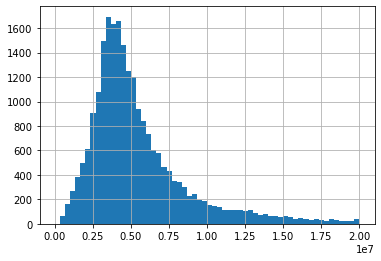

In [44]:
df_geo['last_price'].hist(bins=60, range=(0, 20000000))
plt.show()

Пик приходится на цену 3,5 - 4 млн. Цены более 13 млн. встречаются значительно реже.

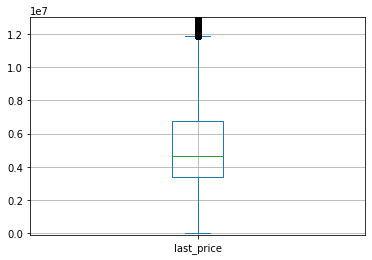

In [45]:
df_geo['last_price'].plot.box(ylim=(-100000, 13000000), grid=True )
plt.show()

Большая часть квартир находится в диапозоне стоимости 0 - 12 млн. рублей. 

In [46]:
len(df_geo.query('last_price > 12000000'))

1926

In [47]:
len(df_geo.query('last_price < 500000'))

14

Как видим значений меньше 500 тыс. и больше 12 млн. около 2000. Эти данные являются выбросами, поэтому можем нормальзовать основные данные исключив эти из DataFrame.

In [48]:
df_norm = df.query('500000 < last_price and last_price < 12000000')

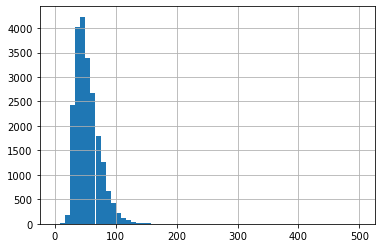

In [49]:
df_norm['total_area'].hist(bins=60, range=(0, 500))
plt.show()

Пик объявлений  приходится на общую площадь 45-50 кв.м. После значения 150 кв.м. остается незначительная часть.

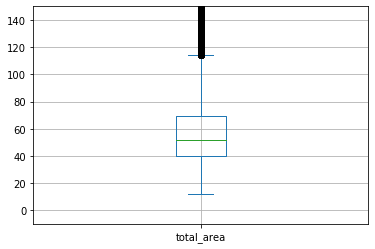

In [50]:
df_geo['total_area'].plot.box(ylim=(-10, 150), grid=True )
plt.show()

Значения площади вкладываются в нормальный диапозон 10-120 кв.м. Посмотрим количество выбросов.

In [51]:
len(df_geo.query('total_area < 20'))

27

In [52]:
len(df_geo.query('total_area > 120'))

1055

Избавляемсяя от выбросов

In [53]:
df_norm = df_norm.query('20 < total_area and total_area < 120')


Изучаем распределение по количеству комнат.

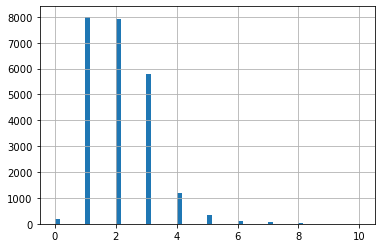

In [54]:
df_geo['rooms'].hist(bins=60, range=(0, 10))
plt.show()

Подваляющее большинство входит в  1 - 3-х комнатные квартиры.

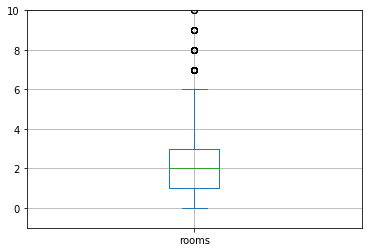

In [55]:
df_geo['rooms'].plot.box(ylim=(-1, 10), grid=True )
plt.show()

Нормальзуем данные, удаляем все где больше 6 комнат.

In [56]:
df_norm = df_norm.query('0 <= rooms and rooms <= 6')

Распределение по высоте потолков.

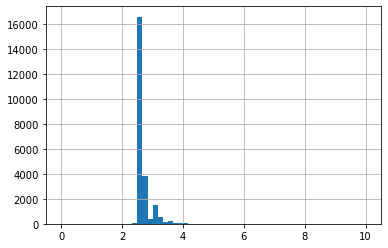

In [57]:
df_geo['ceiling_height'].hist(bins=60, range=(0, 10))
plt.show()

Максимальная частота составляет около 2.5 м., и почти все значения в интервале 2 - 4 м.

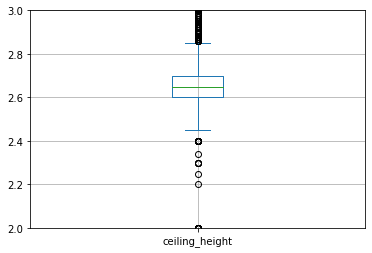

In [58]:
df_geo['ceiling_height'].plot.box(ylim=(2, 3), grid=True )
plt.show()

Уточнился нормальный диапозон: 2.4...2.9 м. Посчитаем количество выбросов.

In [59]:
len(df_geo.query('2.4 > ceiling_height'))

21

In [60]:
len(df_geo.query('2.9 < ceiling_height'))

2712

Удалим лишнее поскольку потолки в нормальных квартирах не могут быть ниже 2.4 и выше 2.9 метра.

In [61]:
df_norm = df_norm.query('2.4 < ceiling_height and 2.9 > ceiling_height ')

Переиндексируем DataFrame после удаления строк.

In [62]:
df_norm.reset_index(drop=True, inplace=True)

Изучим данные о длительности продажи квартир.

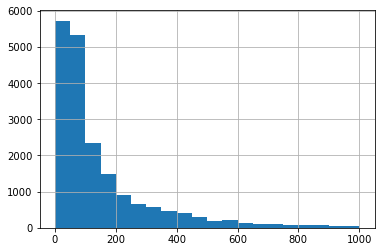

In [63]:
df_norm['days_exposition'].hist(bins=20, range=(0, 1000))
plt.show()

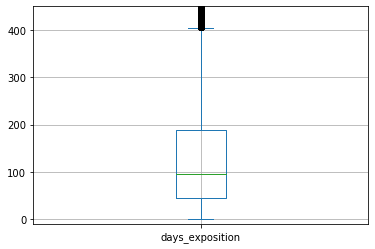

In [64]:
df_norm['days_exposition'].plot.box(ylim=(-10, 450), grid=True )
plt.show()

Большая часть квартир(75%) продается до 200 дней.  Наблюдается резкий спад в районе 100 дней, затем идет постепенное уменьшение длительности продаж, нормальный диапозон заканчивается на значении 400. Посчитаем среднее и медианное значения.

In [65]:
df_norm['days_exposition'].agg(['mean', 'median'])

mean      160.529391
median     95.000000
Name: days_exposition, dtype: float64

Значения среднего выше медианы почти в 2 раза, что подтверждает наличие выбросов за границы нормальных значений 400 дней.

In [66]:
df_norm['days_exposition'].describe()

count    19479.000000
mean       160.529391
std        196.046623
min          1.000000
25%         45.000000
50%         95.000000
75%        189.000000
max       1580.000000
Name: days_exposition, dtype: float64

Можно сделать вывод, что сделка прошла быстро если она вложилась в 45 дней(25% продаж), и долгой, если превысила 189 дней(75%). о большом расбросе данных говорит и стандартное отклонение, которое больше медианы в 2 раза. Отбросим значения выходящие за границы нормы.

In [67]:
df_norm = df_norm.query('days_exposition <= 400')


Узнаем какие факторы больше всего влияют на стоимость квартиры? Зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также узнаем зависимость от даты размещения: дня недели, месяца и года.

In [68]:
df_norm.reset_index(drop=True, inplace=True)

In [69]:
df_norm_cityCenters_nearest = df_norm.query('cityCenters_nearest != -1')
index = df_norm_cityCenters_nearest.index
(df_norm_cityCenters_nearest.query('cityCenters_nearest != -1')
     .pivot_table(index=index,
                  values=['last_price', 'total_area', 'rooms', 'cityCenters_nearest'])
                 .corr()
)

,cityCenters_nearest,last_price,rooms,total_area
cityCenters_nearest,1.000000,-0.300702,-0.031208,-0.069415
last_price,-0.300702,1.000000,0.493719,0.777316
rooms,-0.031208,0.493719,1.000000,0.794698
total_area,-0.069415,0.777316,0.794698,1.000000


Рассмотри данные этой таблицы в графической интерпретации.

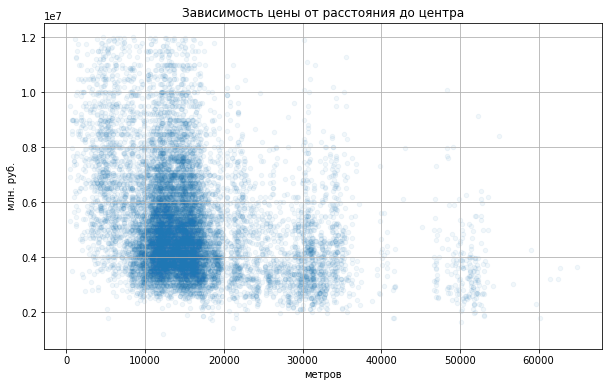

In [70]:
(df_norm_cityCenters_nearest
 .plot(x='cityCenters_nearest',
       y='last_price',
       kind='scatter',
       grid=True,
       alpha=0.06,
       figsize=(10, 6),
      title='Зависимость цены от расстояния до центра',
      xlabel='метров',
      ylabel='млн. руб.')
)
plt.show()

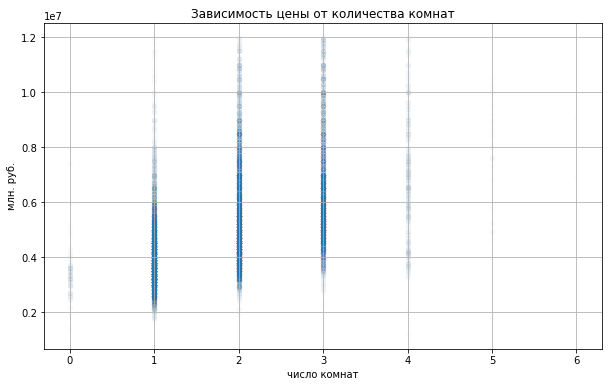

In [71]:
(df_norm_cityCenters_nearest
 .plot(x='rooms',
       y='last_price',
       kind='scatter',
       alpha=0.01,
       grid=True,
       figsize=(10, 6),
       title='Зависимость цены от количества комнат',
      xlabel='число комнат',
      ylabel='млн. руб.'
      ))
plt.show()

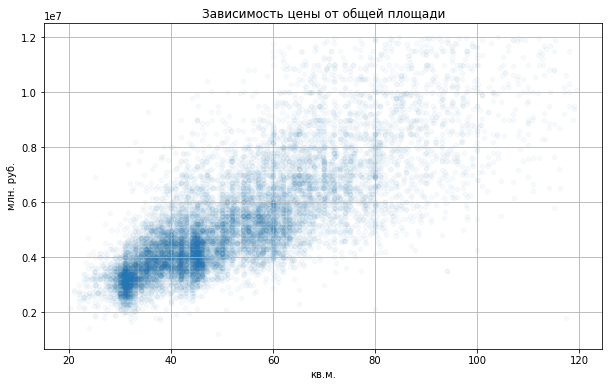

In [72]:
(df_norm_cityCenters_nearest
 .plot(x='total_area',
       y='last_price',
       kind='scatter',
       grid=True,
       alpha=0.03,
       figsize=(10, 6),
       title='Зависимость цены от общей площади',
      xlabel='кв.м.',
      ylabel='млн. руб.'))
plt.show()

Вывод не противоречит логике: удаленность от центра имеет небольшую отрицательную, а количество комнат и общая площадь - положительную корреляцию со стоимостью.

Теперь посмотрим как зависит цена от расположения по группам этажей.

In [73]:
df_norm.groupby('floor_type')['last_price'].agg(['mean', 'median', 'count'])

,mean,median,count
floor_type,,,
другой,4.832903e+06,4450000.0,13106
первый,3.861935e+06,3650000.0,2124
последний,4.140133e+06,3850000.0,2278


Хотя данные в группах распределены неравномерно, можно сделать вывод: средняя и медианная стоимость квартир на первом и последнем этажах, ниже стоимости на остальных. График для наглядности.

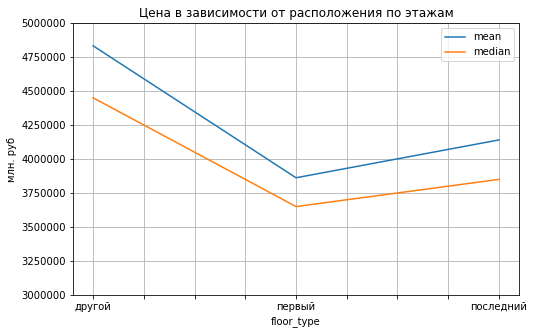

In [74]:
(df_norm.groupby('floor_type')['last_price'].agg(['mean', 'median'])
    .plot(grid=True, ylim=(3000000, 5000000),
          ylabel="млн. руб",
          title='Цена в зависимости от расположения по этажам',
          figsize=(8, 5))
    )
plt.show()

Теперь рассмотрим как зависит стоимость квартиры от времени размещения по: году, месяцу, дню недели.

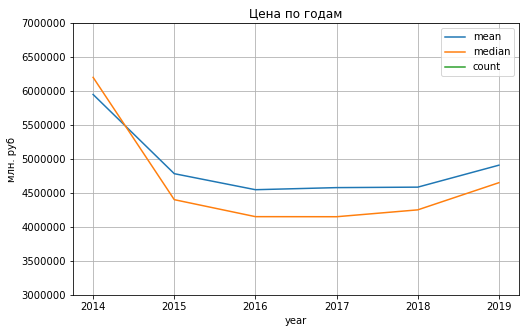

In [75]:
(df_norm.groupby('year')['last_price'].agg(['mean', 'median', 'count'])
        .plot(grid=True, ylim=(3000000, 7000000), ylabel="млн. руб",
            title='Цена по годам',
            figsize=(8, 5))
)
plt.show()

Цена в 2014 самая высокая при количестве продаж 5. Затем она снижается к 2015 году примерно на 25%, и до 2018 остается приблизительно на одном уровне, одновременно с ростом числа объявлений, что свидетельствует о стабилизации на рынке недвижимости. К 2019 наблюдается небольшой рост цены, однако снизилось количество объявлений. Рост цены объясняется снижением предложения и, как следствие, повышения спроса.

In [76]:
df_norm.groupby('month')['last_price'].agg(['mean', 'median', 'count'])

,mean,median,count
month,,,
1,4.576008e+06,4250000.0,1106
2,4.613267e+06,4240000.0,2000
3,4.622962e+06,4300000.0,1904
4,4.734058e+06,4450000.0,1788
5,4.561878e+06,4225000.0,876
6,4.430681e+06,4070000.0,1272
7,4.592835e+06,4190000.0,1204
8,4.641944e+06,4250000.0,1312
9,4.666168e+06,4250000.0,1469


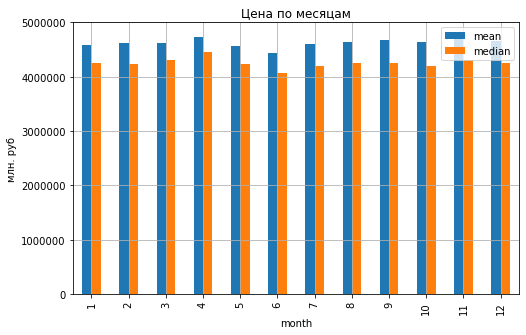

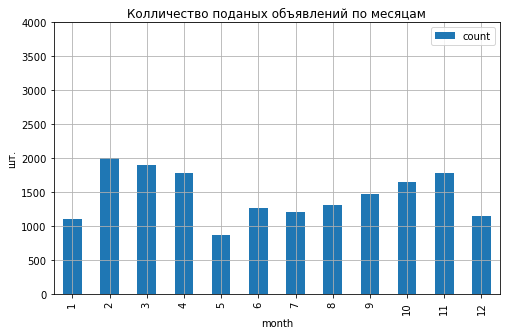

In [77]:
(df_norm.groupby('month')['last_price']
 .agg(['mean', 'median'])
 .plot(kind='bar',
       grid=True,
       ylim=(0, 5000000),
       ylabel="млн. руб",
        title='Цена по месяцам',
        figsize=(8, 5))
)
plt.show()
(df_norm.groupby('month')['last_price']
 .agg([ 'count'])
 .plot(kind='bar',
       grid=True,
       ylim=(0,4000),
       ylabel="шт.",
      title='Колличество поданых объявлений по месяцам',
     figsize=(8, 5))
)
plt.show()

В течении года цена держится примерно на одном уровне. Что касается числа объявлений то наблюдается снижение с февраля(2000) по май(900), затем рост до ноября(1800), и опять снижение, декабрь-январь(1100). Объяснение может быть следующее. Декабрь - подготовка к Новому году, январь - новогодние каникулы характеризуются снижением покупательской способности населения. Реский всплеск в феврале, и постепенное снижение к маю - отток финансов на подготовку к летним отпускам. Рост с середины лета до ноября - послеотпускная активность.

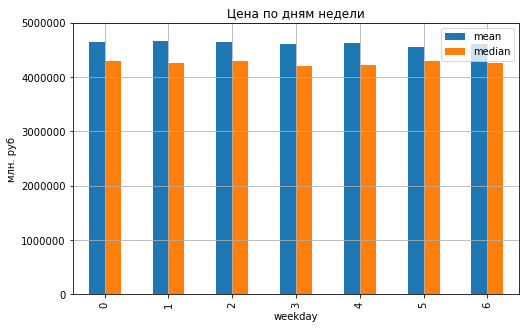

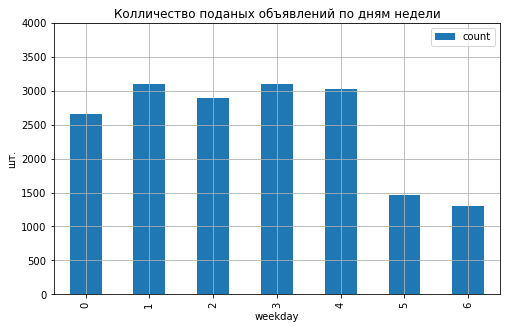

In [78]:
(df_norm.groupby('weekday')['last_price']
 .agg(['mean', 'median'])
 .plot(kind='bar',grid=True, ylim=(0, 5000000), ylabel="млн. руб",
            title='Цена по дням недели',
            figsize=(8, 5))
)
plt.show()
(df_norm.groupby('weekday')['last_price']
         .agg([ 'count'])
         .plot(kind='bar',
         grid=True,
           ylim=(0,4000),
           ylabel="шт.",
            title='Колличество поданых объявлений по дням недели',
            figsize=(8, 5))
)
plt.show()

Цена от дня недели не меняется, наблюдается снижение количества объявлений в субботу(1500) и воскресенье(1350). В течении рабочей недели количество объявлений стабильно, в районе 2900-3100.

Посмотрим как количесво водоемов в окресности влияет на стоимость

In [79]:
df_norm_pods = df_norm.loc[:, ['last_price', 'ponds_around3000']]
df_norm_pods.groupby('ponds_around3000')['last_price'].agg(['mean', 'count'])

,mean,count
ponds_around3000,,
0,4.259641e+06,11605
1,5.202440e+06,4091
2,5.450257e+06,1182
3,6.056325e+06,630


С увеличением количества водоемор растет средняя стоимость квартиры.

Посмотрим как количесво парков в окресности влияет на стоимость квартиры.

In [80]:
df_norm_pods = df_norm.loc[:, ['last_price', 'parks_around3000']]
df_norm_pods.groupby('parks_around3000')['last_price'].agg(['mean', 'count'])

,mean,count
parks_around3000,,
0,4.325043e+06,12576
1,5.408747e+06,3744
2,5.444838e+06,942
3,4.889734e+06,246


Также видим увеличение средней стоимости квартиры с увеличением количества парков в окресности 3 км. Однако при количестве больше двух наблюдается снижение стоимости на фоне значительного снижения количества таких квартир.

Выберем 10 населённых пунктов с наибольшим числом объявлений

In [81]:
# сделаем срез
df_norm_locality_name = df_norm.loc[:, ['locality_name','price_qu_m', 'last_price']]
df_norm_locality_name = df_norm_locality_name.groupby('locality_name')[['price_qu_m', 'last_price']].agg(['mean', 'count'])

# отберем топ-10 по числу объявлений
top_10_locality_name = df_norm_locality_name.sort_values(('last_price','count'), ascending=False)[:10]

# отберем нужные столбцы 
top_10_locality_name = top_10_locality_name.loc[:, [('price_qu_m','mean'), ('price_qu_m', 'count'), ('last_price', 'mean') ]]

# и переименуем
top_10_locality_name.columns = ['mean_price_qu_m','count','mean_last_price']

# приведем к целочисленому типу
top_10_locality_name['mean_price_qu_m'] = top_10_locality_name['mean_price_qu_m'].astype(int)
top_10_locality_name['mean_last_price'] = top_10_locality_name['mean_last_price'].astype(int)
top_10_locality_name


,mean_price_qu_m,count,mean_last_price
locality_name,,,
Санкт-Петербург,104876,10857,5412694
посёлок Мурино,85916,470,3632064
посёлок Шушары,78643,396,4096713
Всеволожск,67290,330,3703682
посёлок Парголово,89963,295,4497156
Колпино,75312,290,3747331
Пушкин,99417,266,5138497
деревня Кудрово,92730,257,4254788
Гатчина,68469,251,3373642


Отсортируем по средней стоимости квадратного метра

In [82]:
top_10_locality_name.sort_values('mean_price_qu_m')

,mean_price_qu_m,count,mean_last_price
locality_name,,,
Выборг,57887,186,2995193
Всеволожск,67290,330,3703682
Гатчина,68469,251,3373642
Колпино,75312,290,3747331
посёлок Шушары,78643,396,4096713
посёлок Мурино,85916,470,3632064
посёлок Парголово,89963,295,4497156
деревня Кудрово,92730,257,4254788
Пушкин,99417,266,5138497


Самый дешевый кв. м. недвижимости в Выборге, самый дорогой в Санкт-Петербурге.

Сортируем по средней стоимости

In [83]:
top_10_locality_name.sort_values('mean_last_price')

,mean_price_qu_m,count,mean_last_price
locality_name,,,
Выборг,57887,186,2995193
Гатчина,68469,251,3373642
посёлок Мурино,85916,470,3632064
Всеволожск,67290,330,3703682
Колпино,75312,290,3747331
посёлок Шушары,78643,396,4096713
деревня Кудрово,92730,257,4254788
посёлок Парголово,89963,295,4497156
Пушкин,99417,266,5138497


Неудивительно совпадение, недвижимость так же самая дешевая в Выборге, самая дорогая в Санкт-Петербурге.

Самый дешевый кв.м. площади в десятке топ-10 по количеству объявлений принадлежит Выборгу(57887), самый дорогой Санкт-Петербургу(104876)

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Расстояние до центра приведем в километры и округлим до целых значений. Посчитаем среднюю цену для каждого километра. Затем построим график, который покажет, как цена зависит от удалённости от центра.

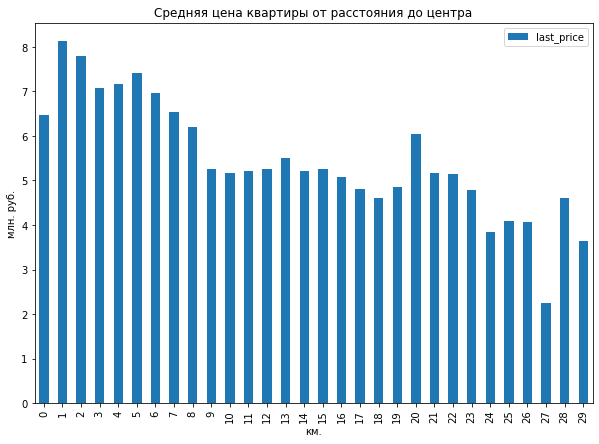

In [132]:
# выделяем Санкт-Петербург
df_norm_spb = df_norm.query('cityCenters_nearest != -1 and locality_name == "Санкт-Петербург"')
df_norm_spb = df_norm_spb.loc[:, ['locality_name', 'cityCenters_nearest','last_price', 'price_qu_m']]

# приводим расстояние в км, округляем
df_norm_spb['cityCenters_nearest'] = (df_norm_spb['cityCenters_nearest']/1000).round().astype(int)

# группируем по километрам и строим гистограмму
df_norm_spb_group = df_norm_spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=('mean'))/1e6

(df_norm_spb_group
     .plot( y='last_price',
           kind='bar',
           figsize=(10, 7),
           xlabel='км.',
           ylabel='млн. руб.',
           title='Средняя цена квартиры от расстояния до центра'))
plt.show()

#### Поиск зависимости средней цены квартиры от расстояния до центра и количества комнат

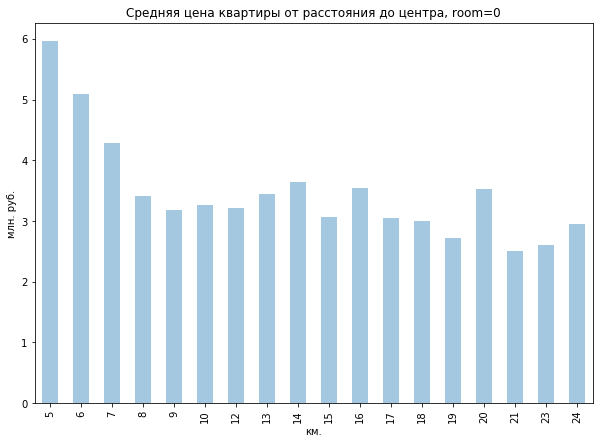

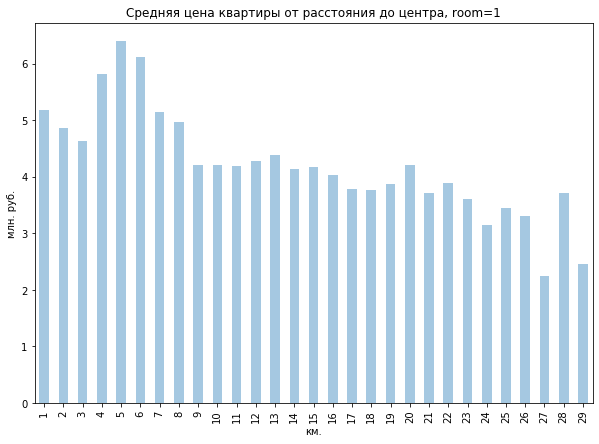

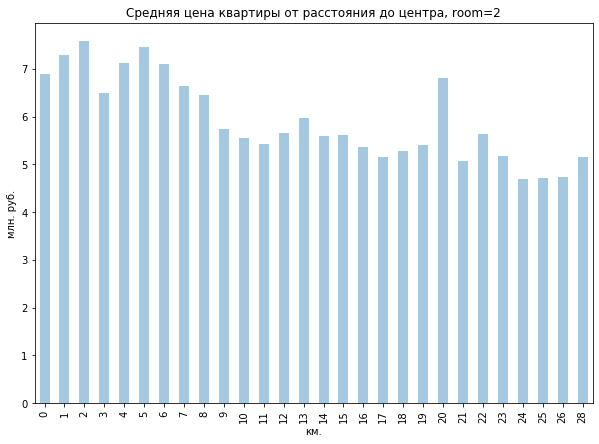

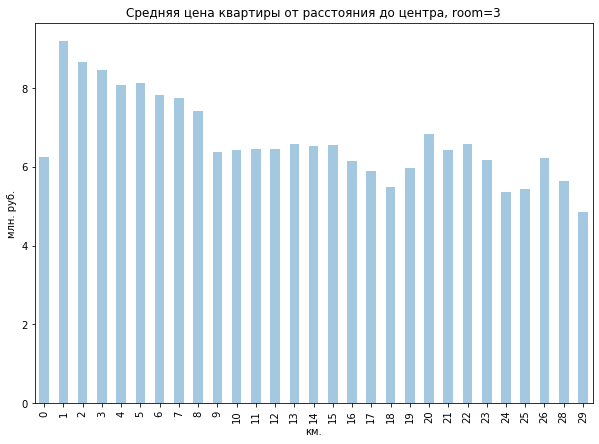

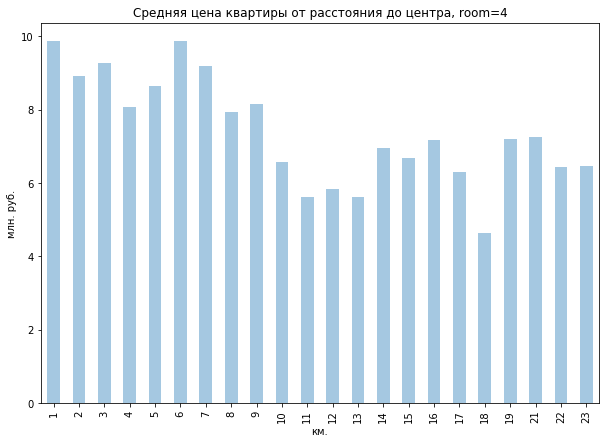

In [130]:
df_norm_spb_rooms = df_norm.query('cityCenters_nearest != -1 and locality_name == "Санкт-Петербург"')
df_norm_spb_rooms = df_norm_spb_rooms.loc[:, ['locality_name', 'cityCenters_nearest','last_price', 'price_qu_m', 'rooms']]
df_norm_spb_rooms['cityCenters_nearest'] = (df_norm_spb_rooms['cityCenters_nearest']/1000).round().astype(int)
# df_norm_spb_1_room
for i in range(5):
    df_norm_spb_room = df_norm_spb_rooms.query(f'rooms == {i}')

#     df_norm_spb_room_group = df_norm_spb_room.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc=('mean'))
    df_norm_spb_room_group = df_norm_spb_room.groupby('cityCenters_nearest').last_price.mean()/1e6
    (df_norm_spb_room_group
         .plot(y='last_price',
               kind='bar',
               figsize=(10, 7),
               xlabel='км.',
               ylabel='млн. руб.',
               alpha=0.4,
               title=f'Средняя цена квартиры от расстояния до центра, room={i}'))
    plt.show()

#### Поиск зависимости цены кв. метра жилья от расстояния до центра и количества комнат

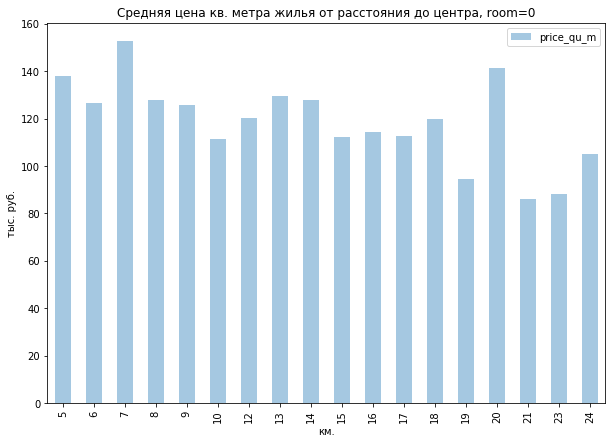

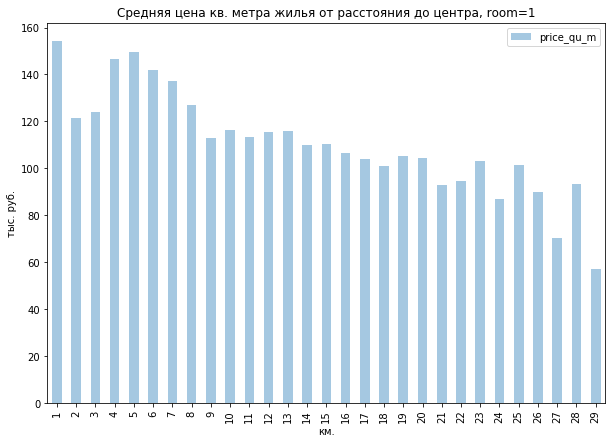

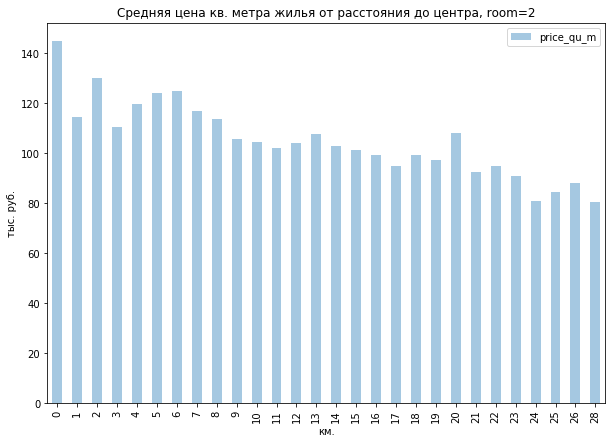

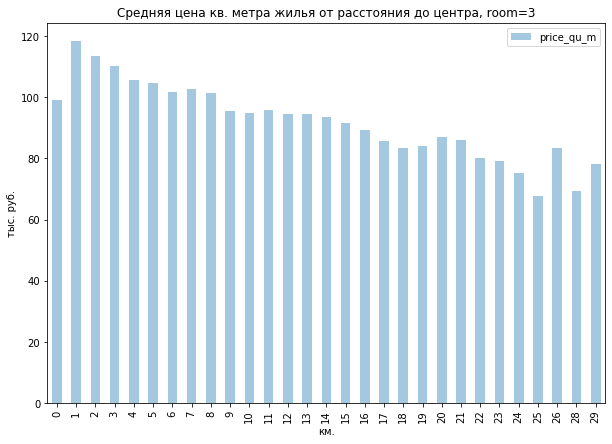

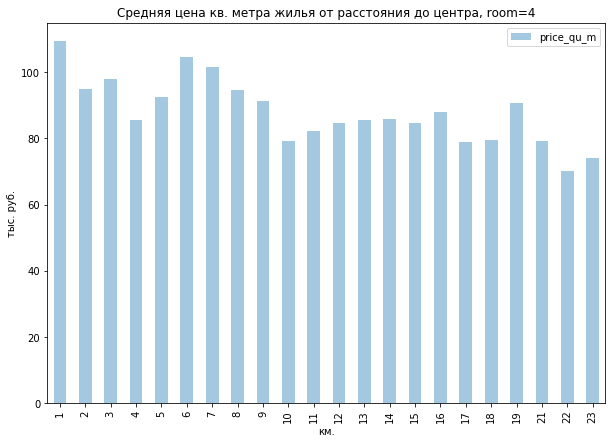

In [136]:
df_norm_spb_rooms = df_norm.query('cityCenters_nearest != -1 and locality_name == "Санкт-Петербург"')
df_norm_spb_rooms = df_norm_spb_rooms.loc[:, ['locality_name', 'cityCenters_nearest','last_price', 'price_qu_m', 'rooms']]
df_norm_spb_rooms['cityCenters_nearest'] = (df_norm_spb_rooms['cityCenters_nearest']/1000).round().astype(int)
# df_norm_spb_1_room
for i in range(5):
    df_norm_spb_room = df_norm_spb_rooms.query(f'rooms == {i}')

    df_norm_spb_room_group = df_norm_spb_room.pivot_table(index='cityCenters_nearest', values='price_qu_m', aggfunc=('mean'))/1000
    (df_norm_spb_room_group
         .plot(y='price_qu_m',
               
               kind='bar',
               figsize=(10, 7),
               xlabel='км.',
               ylabel='тыс. руб.',
               alpha=0.4,
               title=f'Средняя цена кв. метра жилья от расстояния до центра, room={i}'))
plt.show()

По гистограмме видно, что резкое снижение цены километра (примерно на 1 млн. рублей) наблюдается после отметки 2, затем 8. Но исходя из понятия "центр" сузим наш выбор до первой отметки. То есть центральный район - в радиусе 2 км.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [85]:
df_centr = df_norm.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 2000')
df_centr = df_centr.loc[:, ['last_price', 'total_area', 'rooms', 'ceiling_height','first_day_exposition', 'floor_type']]

df_centr.corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.723387,0.481536,0.132154
total_area,0.723387,1.000000,0.769679,0.042173
rooms,0.481536,0.769679,1.000000,0.027437
ceiling_height,0.132154,0.042173,0.027437,1.000000


Видим положительную корреляцию цены к общей площади и количеству комнат. Корелляция цены и высоты потолков близка к 0.
Изобразим эту матрицу графически.

Посмотрим как категория этажности влияет на стоимость.

In [86]:
df_centr.groupby('floor_type')['last_price'].agg(['mean', 'count'])

,mean,count
floor_type,,
другой,7.337026e+06,61
первый,6.844538e+06,13
последний,8.522565e+06,23


Первые этажи самые дешевые. Однако последние этажи получают самую высокую стоимость. 
Все правильно, в центре элитные пентхаузы вносят свою коррекцию в стоимость.


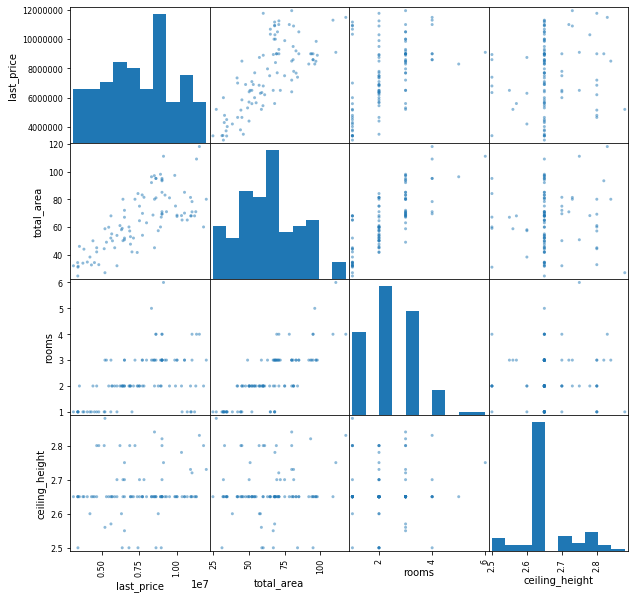

In [87]:
pd.plotting.scatter_matrix(df_centr, figsize=(10, 10), alpha=0.5)
plt.show()

Построим для наглядности hotplot.

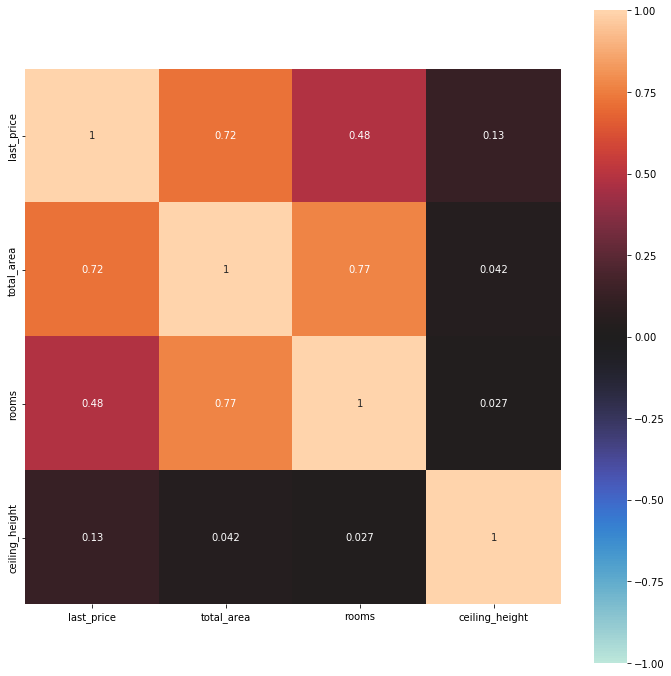

In [88]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_centr.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

Сравним корелляцию данных по центру Санкт-Петербурга с общими данными.

In [89]:
df_all = df_norm.loc[:, ['last_price', 'total_area', 'rooms', 'ceiling_height','first_day_exposition']]
df_all.corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.680387,0.415061,0.244100
total_area,0.680387,1.000000,0.802228,0.130646
rooms,0.415061,0.802228,1.000000,-0.103426
ceiling_height,0.244100,0.130646,-0.103426,1.000000


Hotplot для наглядности.

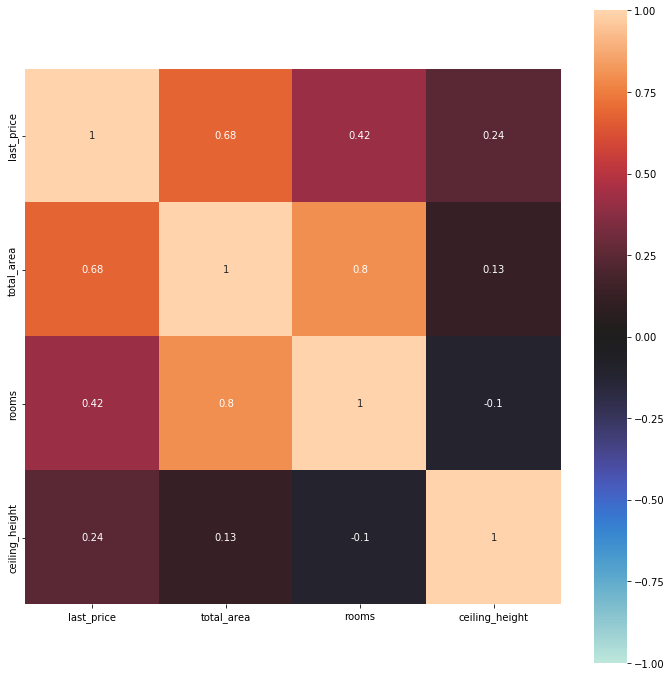

In [90]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_all.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

Сравнивая корелляцию отдельно по Санкт-Петербургу и по общим данным видно, что корелляция по выделеным для Санкт-Петербурга данным  выше по всем основным показателям.

Посмотрим hotmap по всем параметрам

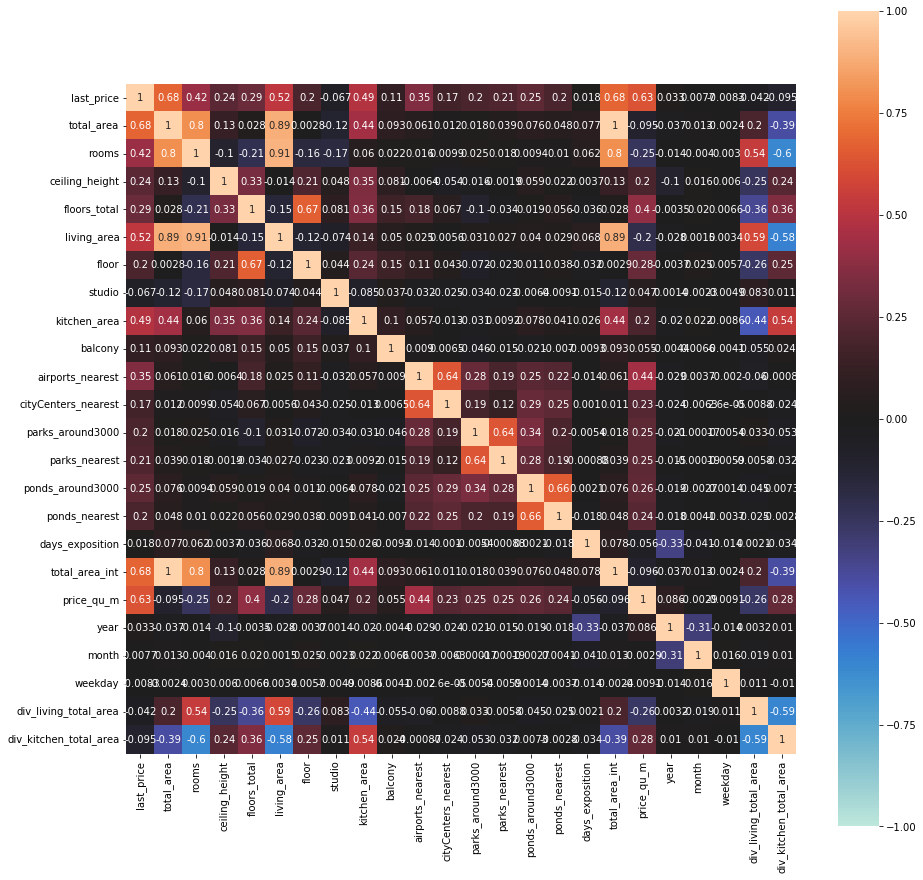

In [91]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_norm.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

### Вывод
Был отобран рейтинг населенных пунктов топ-10 по количеству объявлений. Среди них самая дорогая недвижимость в Санкт-Петербурге, самая дешевая в Выборге.

Наибольшее влияние на стоимость оказывают (по коэффициентам корелляции):

- общая плошадь(0,68)
- жилая площадь(0,52)
- размер кухни(0,49)
- количество комнат(0,42)

Незначительно влияют на стоимость: наличие поблизости аэропорта(0,35), также водоемов(0,25) и парков(0,2).
Остальные параметры сколь нибудь значимого влияния не оказывают.

По изменению средней стоимости в пределах Санкт-Петербурга выделии центральную часть, радиус составил примерно 2 км.
Влияние основных параметров на стоимость в пределах Санкт-Петербурга усилилась.



## Общий вывод

Для исследования была предоставлена база объявлений о продаже недвижимости ленинградской области и города Санкт-Петербурга за несколько лет. Данные были изучены, проведена предварительная обработка в виде заполнения пропусков, выявления и очищение недостоверных данных. Пропущенные значения заполнялись медианными значениями сгруппированых характерных данных, при отсутствии таковых медианой самого стогбца. Медианные значения были выбранны из соображения минимального искажения данных при заполнении пропусков. Также подготовлены и преобразованы типы данных: строковый тип с датами преобразован в тип datetime, количественные данные, не требующие высокой точности в целочисленый тип int. Проверены  данные и на отсутствие дубликатов. 
В процессе подготовки были добавлены необходимые столбцы (год, месяц, день недели), посчитаны и добавлены столбцы цены квадратного метра и соотношения жилой и общей площади, а также отношение площади кухни к общей.  Добавлен столбец с категориями этажности (первый, последний, другой).

Были изучены влияние на стоимость площади, число комнат и высота потолков. Обнаружены положительные корреляции цены к площади 0.78, к числу комнат 0.49, а к удаленности от центра отрицательная (-0.3).
Интересную особенность удалось обнаружить у групп разбитым по отношению этажности. На общих данных средняяя стоимость последних этажей оказалась ниже чем у остальных 4.1 против 4.8 млн.руб. Однако в центральной части Санкт-Петербурга цена последних этажей оказалась самой высокой - 8.5 против 7.3 млн. руб. у других. Первые этажи самые дешевые в обоих выборках.

Цена в 2014 самая высокая при количестве продаж 5. Затем она снижается к 2015 году примерно на 25%, и до 2018 остается приблизительно на одном уровне, одновременно с ростом числа объявлений, что свидетельствует о стабилизации на рынке недвижимости. К 2019 наблюдается небольшой рост цены, однако снизилось количество объявлений. Рост цены объясняется снижением предложения и, как следствие, повышения спроса.
Зависимости цены от месяца или дня недели, в который подано объявление не обнаружено, цена стабильна возле значения в 4.5 млн.руб.

Сделав выборку топ-10 городов по числу поданых объявлений выяснилось, что лидирует по средней цене кв.м. жилища Санкт_Петербург 104876 руб., а замыкает десятку Выборг с ценой 57887 руб.

Наличие в окресностях водоемов повышает стоимость от 4.3 млн.руб. при количестве 0, до 6.1 млн.руб. при количестве 3.

Наличие в окресностях парков также повышает цену от 4.3 при 0, до  5.4 при 1 или 2 водоемах, при 3 она немного снижается до 4.9 млн.руб. 

При изучении влияния удаленности от центра на цену была выявлена область в радиусе двух километоров  скочкообразным снижением средней цены.
Анализ выделеной области влияния различнах факторов как площадь, число комнат, высота потолков выявили теже закономерности, что и на полных данных: положительная корелляция на цену площади (0.68), числа комнат(0.42), и высоты потолков(0.24).

Остальные параметры сколь нибудь значимого влияния не оказывают.